
# Project: Investigate of a No-Show Medical Appoitments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The datasset is a collection of 110k records of medical appointments in Brazil and is focused on whether or not the patients show up for their appointments. Various information about the patient are included in the dataset such as Gender, Age, Neighborhood, whether the patient has either of the health conditions such as Diabetes, Hypertension, Handicap or Alcoholism.

### Questions to be investigated
- What is the overall shows vs no shows by appointment
- What is the breakdown of shows vs no shows by health conditions
- Which is the overall shows vs no shows by neighborhood
- What is the breakdown of shows vs no shows by SMS received and SMS not received

### Methodology
The dataset has been prepared by using the process of data wrangling, data cleaning, data analysis and data visualization to understand and create the value out of the raw data.

### Libraries used
Pandas, Numpy, Matplotlib, and Seaborn libraries have been imported to investigate the dataset

In [94]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In this section, the dataset has been checked for any inconsistencies, missing values, duplicates, column renaming, and converting datatypes

### General Properties

In [95]:
# Load the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [239]:
# Display the top 5 rows of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No-show-converted,showed,converted_noshow,ApppointmentDay
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No,1.0,0,0,2016-04-29 00:00:00+00:00
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No,1.0,0,0,2016-04-29 00:00:00+00:00
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No,1.0,0,0,2016-04-29 00:00:00+00:00
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No,1.0,0,0,2016-04-29 00:00:00+00:00
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No,1.0,0,0,2016-04-29 00:00:00+00:00


### Checking for null values to clean data

In [5]:
df.isnull().sum()
# there are no null values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Checking for duplicates

In [6]:
sum(df.duplicated())
# there are no duplicate values

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Rename Columns

In [222]:
# Fixing the typos in few column headers
df.rename(columns ={'Hipertension' : 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)

### Convert some fields containing dates to datetime type

In [223]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ApppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

### Summarize the dataset

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The minimum age of -1 above seems odd. This gives us a flag to check if there are are fields that have age of 0 or less than that.

In [224]:
# Checking to see if the age columns have values of 0 or less
df[df['Age'] <= 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No-show-converted,showed,converted_noshow,ApppointmentDay
59,7.184428e+13,5638545,F,2016-04-29 08:08:43+00:00,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No,1,0,0,2016-04-29 00:00:00+00:00
63,2.366233e+14,5628286,M,2016-04-27 10:46:12+00:00,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No,1,0,0,2016-04-29 00:00:00+00:00
64,1.885174e+14,5616082,M,2016-04-25 13:28:21+00:00,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No,1,0,0,2016-04-29 00:00:00+00:00
65,2.718818e+14,5628321,M,2016-04-27 10:48:50+00:00,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No,1,0,0,2016-04-29 00:00:00+00:00
67,8.647128e+13,5639264,F,2016-04-29 08:53:02+00:00,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No,1,0,0,2016-04-29 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16 12:30:58+00:00,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No,1,0,0,2016-06-01 00:00:00+00:00
110346,5.577525e+12,5777724,M,2016-06-06 14:22:34+00:00,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No,1,0,0,2016-06-08 00:00:00+00:00
110454,6.142460e+11,5772400,F,2016-06-03 15:18:44+00:00,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No,1,0,0,2016-06-03 00:00:00+00:00
110460,4.321846e+13,5769545,F,2016-06-03 08:56:51+00:00,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No,1,0,0,2016-06-03 00:00:00+00:00


Since there are 3540 rows of age data that have the value of 0 or less, we can't simply drop these rows. A good way to make use of this dataset is to replace these values with the mean of age column.

In [225]:
mean_age = df['Age'].mean()

In [226]:
df[df['Age'] <= 0] = mean_age

In [227]:
df[df['Age'] <= 0]
# The output below shows that all the age values of 0 or less have been replaced by the mean age values

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No-show-converted,showed,converted_noshow,ApppointmentDay


In [249]:
df['showed'] = df['No-show'].apply(convert_data)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No-show-converted,showed,converted_noshow,ApppointmentDay
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No,1.0,0,0,2016-04-29 00:00:00+00:00
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No,1.0,0,0,2016-04-29 00:00:00+00:00
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No,1.0,0,0,2016-04-29 00:00:00+00:00
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No,1.0,0,0,2016-04-29 00:00:00+00:00
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No,1.0,0,0,2016-04-29 00:00:00+00:00


<a id='eda'></a>
## Exploratory Data Analysis

Various calcuations have been made in order to generate tables and plot different charts to answers the questions in this section.
###  Question 1: What is the proportion of shows vs no shows by appointment?

#### Write a function to convert the yes/no string value to binary and add new columns to the dataset

In [244]:
#function to convert yes/no to 1/0

def convert_data(x):
    if x == 'Yes':
        return 1
    else:
        return 0

df['converted_noshow'] = df['No-show'].apply(convert_data)
#data  = df['converted_noshow'].value_counts()
#data.head()

data = df.groupby('showed')['No-show'].count().reset_index(name = 'count')
data.head()

,showed,count
0,0,88847
1,1,21680


In [246]:
# Dislplay the dataset with new columns
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,No-show-converted,showed,converted_noshow,ApppointmentDay
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No,1.0,0,0,2016-04-29 00:00:00+00:00
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No,1.0,0,0,2016-04-29 00:00:00+00:00
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No,1.0,0,0,2016-04-29 00:00:00+00:00
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No,1.0,0,0,2016-04-29 00:00:00+00:00
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No,1.0,0,0,2016-04-29 00:00:00+00:00


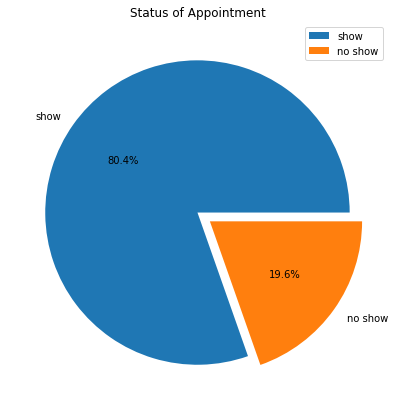

In [267]:
# Data to plot
my_labels = 'show', 'no show'
data  = df['showed'].value_counts()
explode = (0, 0.1)

# Plot
my_labels = 'show', 'no show'
fig = plt.figure(figsize=[7, 7])
plt.pie(data, labels = my_labels, autopct='%1.1f%%', explode = (0,0.1))
plt.title('Status of Appointment')
plt.legend()
plt.show()


The above pie chart shows that the 80% of the population in the dataset showed for the appointment whereas 20% of the population didn't show for their appointment.

###  Question 2: What is the breakdown of shows vs no shows by health conditions?
#### Group the health conditions such as Alcoholism, Diabetes, Handicap, and Hypertension in categorize by shows and no shows

In [232]:
# Categorize by total showed
df_showed_total = df.query('converted_noshow == 0')

# Categorize by total showed who had any of the four health issues i.e. Alcoholism, Diabetes, Handicap or Hypertension
df_showed_by_health = df_showed_total.loc[(df_showed_total.Alcoholism ==1) | (df_showed_total.Diabetes ==1)| (df_showed_total.Handicap ==1)| (df_showed_total.Hypertension ==1)]

# Categorize by total not showed
df_not_showed_total = df.query('converted_noshow == 1')
total_not_showed = df_not_showed_total.shape[0]
# Categorize by total not showed who had any of the four health issues i.e. Alcoholism, Diabetes, Handicap or Hypertension
df_not_showed_by_health = df_not_showed_total.loc[(df_not_showed_total.Alcoholism ==1) | (df_not_showed_total.Diabetes ==1)| (df_not_showed_total.Handicap ==1)| (df_not_showed_total.Hypertension ==1)]


In [233]:
# Total number of showed by health
total_showed = df_showed_by_health.shape[0]


# Total number of not showed by health
total_showed_by_health = df_not_showed_by_health.shape[0]

# Categorize total showed by Alcoholism
df_showed_alc = df_showed_total.query('Alcoholism == 1')
# Total number of showed by health
total_showed_alc = df_showed_alc.shape[0]

# Categorize total showed by Diabetes
df_showed_db = df_showed_total.query('Diabetes == 1')
# Total number of showed by health
total_showed_db = df_showed_db.shape[0]

# Categorize total showed by Handicap
df_showed_hd = df_showed_total.query('Handicap == 1')
# Total number of showed by health
total_showed_hd = df_showed_hd.shape[0]

# Categorize total showed by Hypertension
df_showed_hpt = df_showed_total.query('Hypertension == 1')
# Total number of showed by health
total_showed_hpt = df_showed_hpt.shape[0]

a1 = total_showed_alc / total_showed_by_health
b1 = total_showed_db / total_showed_by_health
c1 = total_showed_hd / total_showed_by_health
d1 = total_showed_hpt / total_showed_by_health

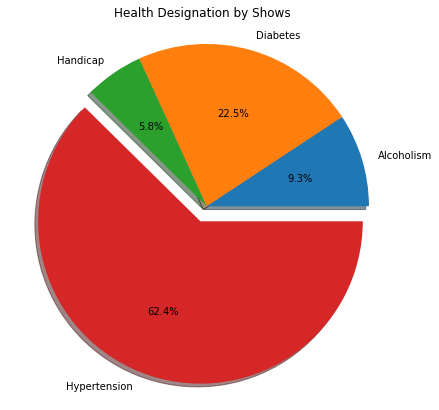

In [268]:
sizes = [a1, b1, c1, d1]
mylabels = ['Alcoholism', 'Diabetes', 'Handicap', 'Hypertension']
plt.pie(sizes, labels = mylabels, explode = (0,0,0,0.1), autopct='%1.1f%%', shadow=True)
plt.title('Health Designation by Shows')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(7,7);

The pie chart above is a breakdown of the data where patients showed for their appoointment and had four health conditions i.e. Diabetes, Alcoholism, Handicap, Hypertension. Patients with Hypertension had the highest show and that with Handicap had the lowest show. 

In [235]:
# Total number of not showed by health
total_not_showed_by_health = df_not_showed_by_health.shape[0]

# Categorize total showed by Alcoholism
df_not_showed_alc = df_not_showed_total.query('Alcoholism == 1')
# Total number of showed by health
total_not_showed_alc = df_not_showed_alc.shape[0]

# Categorize total showed by Diabetes
df_not_showed_db = df_not_showed_total.query('Diabetes == 1')
# Total number of showed by health
total_not_showed_db = df_not_showed_db.shape[0]

# Categorize total showed by Handicap
df_not_showed_hd = df_not_showed_total.query('Handicap == 1')
# Total number of showed by health
total_not_showed_hd = df_not_showed_hd.shape[0]

# Categorize total showed by Hypertension
df_not_showed_hpt = df_not_showed_total.query('Hypertension == 1')
# Total number of showed by health
total_not_showed_hpt = df_not_showed_hpt.shape[0]

a2 = total_not_showed_alc / total_not_showed_by_health
b2 = total_not_showed_db / total_not_showed_by_health
c2 = total_not_showed_hd / total_not_showed_by_health
d2 = total_not_showed_hpt / total_not_showed_by_health

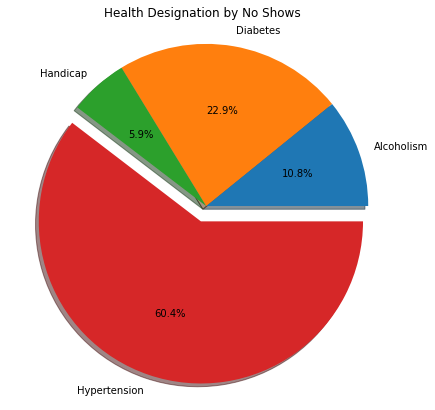

In [236]:
sizes = [a2, b2, c2, d2]
mylabels = ['Alcoholism', 'Diabetes', 'Handicap', 'Hypertension']
plt.pie(sizes, labels = mylabels, explode = (0,0,0,0.1), autopct='%1.1f%%', shadow=True)
plt.title('Health Designation by No Shows')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(7,7);

The pie chart above is a breakdown of the data where patients didn't show for their appoointment and had four health conditions i.e. Diabetes, Alcoholism, Handicap, Hypertension. Patients with Hypertension had the highest no-show and that with Handicap had the lowest no-show.

###  Question 3: Which is the overall shows vs no shows by neighborhood?
#### Group the neighborhood and categorize by shows and no shows

In [205]:
# Categorize total shows by neighbourhood
df_showed_total = df.query('converted_noshow == 0')


shows_by_nh = df_showed_total.groupby("Neighbourhood")["converted_noshow"].count().reset_index(name="count").sort_values("count", ascending=False)
shows_by_nh.head(10)

,Neighbourhood,count
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4586
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635
10,CENTRO,2631
35,ITARARÉ,2591
77,TABUAZEIRO,2559
68,SANTO ANTÔNIO,2262
8,BONFIM,2223


The table above represents the shows by top 10 neighborhood

In [276]:
# Categorize total no shows by neighbourhood
df_not_showed_total = df.query('converted_noshow == 1')

no_shows_by_nh = df_not_showed_total.groupby('Neighbourhood')['converted_noshow'].count().reset_index(name = 'count').sort_values('count', ascending=False)
no_shows_by_nh.count()
no_shows_by_nh.head(10)

,Neighbourhood,count
38,JARDIM CAMBURI,1432
43,MARIA ORTIZ,1194
36,ITARARÉ,898
58,RESISTÊNCIA,875
10,CENTRO,692
40,JESUS DE NAZARETH,676
39,JARDIM DA PENHA,627
9,CARATOÍRA,586
77,TABUAZEIRO,552
8,BONFIM,537


The table above represents the no shows by top 10 neighborhood

## Question 4: What is the breakdown of shows vs no shows by SMS received and SMS not received?

In [303]:
# Data to plot
shows = df.query('converted_noshow == "0"')
no_shows = df.query('converted_noshow == "1"')

SMS_received_showed = shows.query('SMS_received == 1')
a = SMS_received_showed.shape[0]

SMS_received_not_showed = no_shows.query('SMS_received == 1')
b = SMS_received_not_showed.shape[0]
#shows_sms_count = df.query('SMS_received == 1')
#d_ct = SMS_received_count.shape[0]

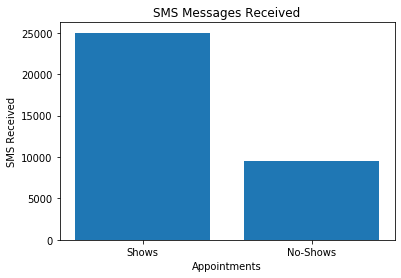

In [304]:
# The plot
locations = [1, 2]
heights = [a, b]
labels = ['Shows', 'No-Shows']

bar = plt.bar(locations, heights, tick_label=labels)
plt.title('SMS Messages Received')
plt.xlabel('Appointments')
plt.ylabel('SMS Received');

The figure above shows the shows and no-shows when SMS messages were received

In [310]:
SMS_not_received_showed = shows.query('SMS_received == 0')
c = SMS_not_received_showed.shape[0]

SMS_not_received_not_showed = no_shows.query('SMS_received == 0')
d = SMS_not_received_not_showed.shape[0]


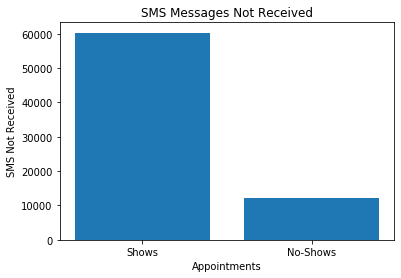

In [311]:
# The plot
locations = [1, 2]
heights = [c, d]
labels = ['Shows', 'No-Shows']

bar = plt.bar(locations, heights, tick_label=labels)
plt.title('SMS Messages Not Received')
plt.xlabel('Appointments')
plt.ylabel('SMS Not Received');

The figure above shows the shows and no-shows when SMS messages were not received

<a id='conclusions'></a>
## Conclusions

The following conclusions were drawn based on the analysis performed.
#### Limitatios:
- The analysis performed was two dimensional. The multivariate analysis can be done to display causation.
- More characteristics about the patients such as employment status, or has any serious medical conditions such as heart disease, tumor etc. would be essential to display correlation

#### Findings:

- What is the overall shows vs no shows by appointment?
<br>80% of the patients showed up for their appointments.
- What is the breakdown of shows vs no shows by health conditions?
<br>Hypertension had the heighest proportion in both shows and no shows and Handicap had the lowest proportion in both shows and no shows.
- Which is the overall shows vs no shows by neighborhood?
<br>JARDIM CAMBURI and MARIA ORTIZ were the top two neighborhood in both shows and no shows.
- What is the breakdown of shows vs no shows by SMS received and SMS not received?
<br>Suprisingly sendig SMS was not the best way to measure if the patient will show up for the appointment. The higher the SMS sent the lower the shows were for the appointment.

#### Conclusions:
Sending an SMS for the appiontment is not neccessary the right option to make sure that the patient will come. About 20% of people that schedule an appointment did not make it to thier appointment. The features such as different gender or alcoholic, diabetes, handicap, hypertension is not a factor to decide if the person would come to the appointment.This exploratory analysis was not able to find any correlation between neighborhood, notifications sent, health conditions cs shows and no shows. More statistical measures can be immplemented to find the better results.

In [312]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255